In [1]:
from statistics import linear_regression

from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [2]:
x = np.random.uniform(-3,5,100)

In [21]:
y = x ** 2 + 4 * x + 3 + 5 * np.random.randn(100)

In [5]:
y

array([31.30323628, 30.35854121, 20.00670624, 13.74204518,  8.51463907,
       18.0421079 , 13.54045702, 33.95764758,  1.48760943, 16.95750419,
       -0.1294144 , -1.95595817,  7.54221254, -1.3223349 , -0.23126225,
       13.75544736, 15.99452549, -1.92491117, -1.00511213,  3.20108305,
       -1.60840435,  3.30298926, 24.86838878,  3.08508482,  0.12423906,
       26.49246057, 15.585307  , -2.74769418, 47.32917118, 22.18153008,
       13.6118077 , 24.62687734,  0.22492089, -3.18483228, 24.43255689,
       19.75022065, -2.36790436,  2.57603022, -1.9416514 ,  8.00008913,
        2.41361323, 15.22448715, 37.37000652, 10.73412065, 47.59620355,
       13.71099187, -1.44808186, 40.3878843 , 31.93634842, 22.14836585,
        8.72348741,  9.77112049,  0.45408711,  1.17604363, -2.62045052,
        0.77588597,  3.31626094, -2.4570179 ,  2.86284301,  1.39763665,
       -3.51269222, 21.29227613, 35.58429521,  0.23176157, 46.49692219,
       -3.88875218, 45.2709416 ,  0.99163017, 14.77359481, -2.58

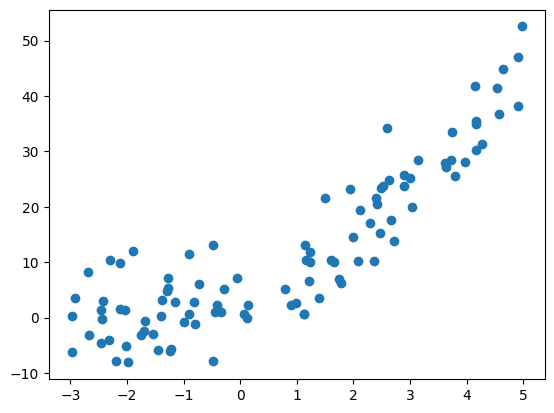

In [22]:
plt.scatter(x,y)
plt.autoscale()
plt.show()

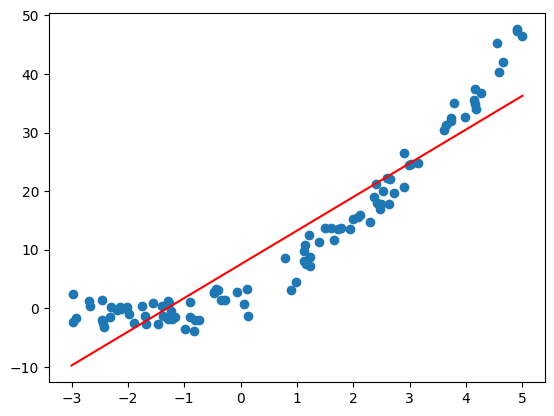

In [7]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
X = x.reshape(-1,1)
linear_regression.fit(X, y)

x_new = np.linspace(-3,5,200).reshape(-1,1)
y_pred = linear_regression.predict(x_new)

plt.scatter(X, y)
plt.plot(x_new, y_pred, c="r")

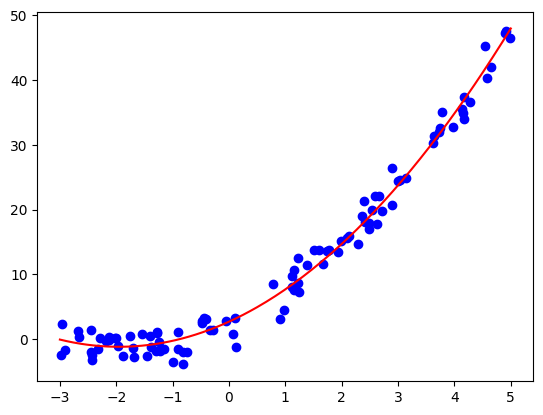

In [8]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(X)

lr = linear_regression.fit(x_poly, y)
x_new = np.linspace(-3,5,200).reshape((-1,1))
x_new_poly = poly.transform(x_new)
y_pred = lr.predict(x_new_poly)

plt.scatter(X,y,c="b")
plt.plot(x_new, y_pred, c="r")

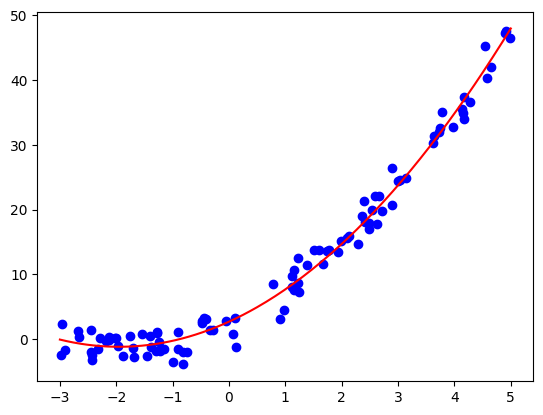

In [9]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
lr = LinearRegression().fit(X_poly, y)

x_new = np.linspace(-3, 5, 200).reshape(-1, 1)
x_new_poly = poly.transform(x_new)       # 关键：保持与训练一致的变换
y_pred = lr.predict(x_new_poly)

plt.scatter(X, y, c="b")
plt.plot(x_new, y_pred, c="r")
plt.show()

In [10]:
x_poly

array([[ 1.00000000e+00,  3.64257339e+00,  1.32683409e+01],
       [ 1.00000000e+00,  3.61190536e+00,  1.30458604e+01],
       [ 1.00000000e+00,  2.52909566e+00,  6.39632487e+00],
       [ 1.00000000e+00,  1.50080483e+00,  2.25241514e+00],
       [ 1.00000000e+00,  7.89630248e-01,  6.23515929e-01],
       [ 1.00000000e+00,  2.41312088e+00,  5.82315238e+00],
       [ 1.00000000e+00,  1.93968908e+00,  3.76239373e+00],
       [ 1.00000000e+00,  4.17010689e+00,  1.73897915e+01],
       [ 1.00000000e+00, -3.43150104e-01,  1.17751994e-01],
       [ 1.00000000e+00,  2.47672528e+00,  6.13416811e+00],
       [ 1.00000000e+00, -2.12150391e+00,  4.50077884e+00],
       [ 1.00000000e+00, -2.45587200e+00,  6.03130727e+00],
       [ 1.00000000e+00,  1.16002812e+00,  1.34566523e+00],
       [ 1.00000000e+00, -1.70154824e+00,  2.89526642e+00],
       [ 1.00000000e+00, -2.18660833e+00,  4.78125599e+00],
       [ 1.00000000e+00,  1.78085705e+00,  3.17145184e+00],
       [ 1.00000000e+00,  2.12257114e+00

[0.         3.96829991 1.01572466]


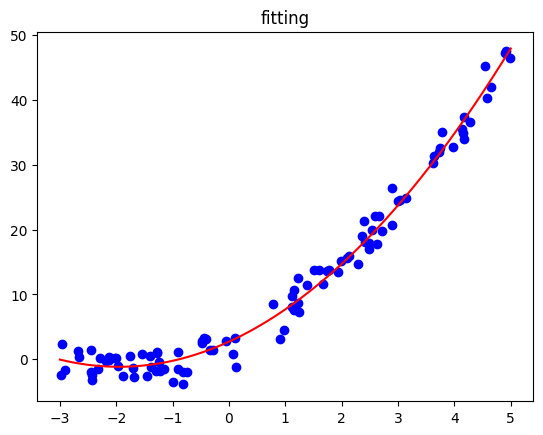

In [11]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(
    PolynomialFeatures(degree=2),
    LinearRegression()
)
model.fit(X,y)
# plt.scatter(X,y)
lr = model.named_steps["linearregression"]
print(lr.coef_)
xx = np.linspace(-3,5,200)
y_pred = model.predict(xx.reshape(-1,1))
plt.scatter(X,y, c="b")
plt.plot(xx, y_pred,c="r")
plt.title("fitting")
plt.show()

### 不使用 pipeline 的过程

In [12]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
x_poly = poly.transform(X)
linear_regression = LinearRegression()
# ......


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(),
    LinearRegression()
)

x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

model.fit(x_train, y_train)

,steps,"[('standardscaler', ...), ('polynomialfeatures', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,degree,2
,interaction_only,False
,include_bias,True
,order,'C'


In [14]:
model.score(x_test, y_test)

0.97421967382571

In [15]:
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.7)
params = {
    'polynomialfeatures__degree': [1, 2, 3, 5],
    'linearregression__n_jobs':[-1]
}

model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(),
    LinearRegression()
)

grid = GridSearchCV(model, params)

grid.fit(x_train, y_train)
grid.score(x_test, y_test)

grid.best_estimator_

,steps,"[('standardscaler', ...), ('polynomialfeatures', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,degree,3
,interaction_only,False
,include_bias,True
,order,'C'


Degree: 1, score: 0.7624022957470182
Degree: 2, score: 0.866376854993237
Degree: 5, score: 0.8687216060140606
Degree: 10, score: 0.8762854473921662
Degree: 15, score: 0.8806042966821955
Degree: 20, score: 0.8812498095200118


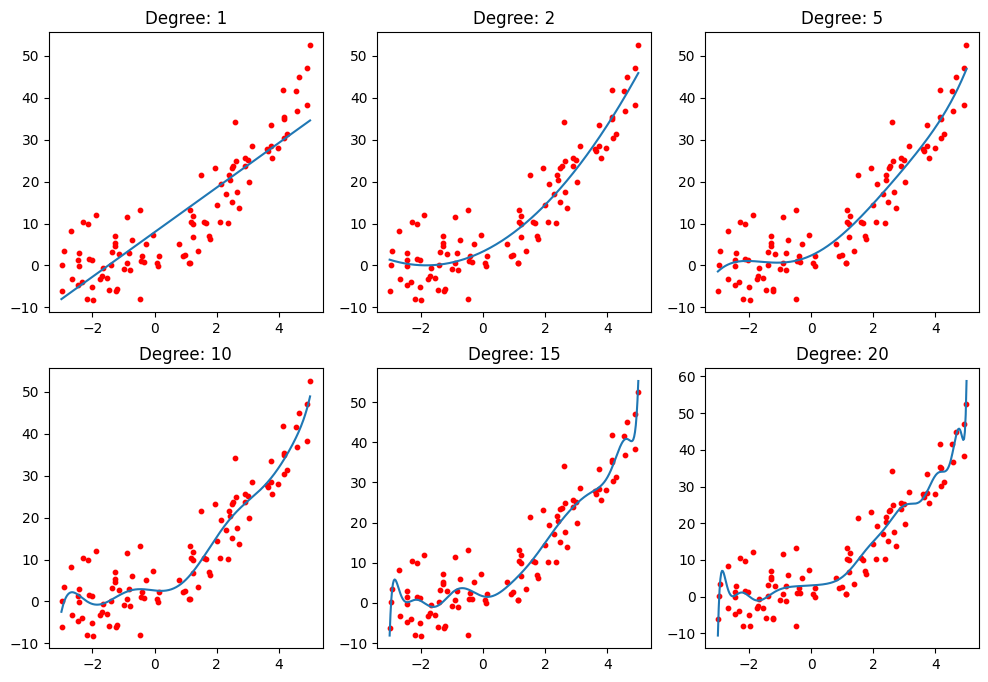

In [24]:
degrees = [1, 2, 5,10,15,20]
plt.rcParams["figure.figsize"] = (12, 8)

for i, degree in enumerate(degrees):
    model = make_pipeline(
        PolynomialFeatures(degree=degree),
        LinearRegression()
    )

    model.fit(X,y)
    x_new = np.linspace(-3,5,300).reshape(-1,1)
    y_pred = model.predict(x_new)

    plt.subplot(2,3,i+1)

    plt.title(f"Degree: {degree}")
    plt.ylim()
    plt.scatter(X, y, s = 10, c="r")
    plt.plot(x_new, y_pred)
    print(f"Degree: {degree}, score: {model.score(X,y)}")
